# Metode Fuzzy
### import library numpy(untuk mengolah list dan angka) dan panda(untuk membaca dataset)

In [54]:
import numpy as np
import pandas as pd

### read dataset kemudian menampilkan dataset

In [55]:
data_durian = pd.read_csv("dataset/dataset.csv")
data_durian

,Usia,Berat,Keliling,Ukuran_batang,Jarak_duri,Keterangan
0,14,753,44.0,4.5,10.0,Matang
1,18,505,42.0,4.0,10.0,Matang
2,17,750,43.0,3.0,10.0,Matang
3,15,755,44.0,5.0,10.0,Matang
4,14,815,45.0,4.2,10.0,Matang
5,17,660,41.5,4.5,10.0,Matang
6,15,700,42.0,3.0,10.0,Matang
7,16,820,46.0,4.0,10.0,Matang
8,12,850,44.0,4.5,10.0,Mentah
9,11,830,42.0,4.2,10.0,Mentah


### menghitung field usia untuk mencari nilai semesta pembicaraan
### berdasarkan minimal nilai dan maksimal nilai
### mid_usia sebagai domain untuk fuzzy antara output masak @ mentah

In [56]:
def get_average(min,max) :
    return (min + max) / 2

In [57]:
data_usia = pd.DataFrame(data_durian)
data_usia = data_usia['Usia'].tolist()
_data_usia = data_usia
print(_data_usia)
min_usia = min(data_usia)
max_usia = max(data_usia)
# mid_usia = get_average(min_usia,max_usia) #13.5
mid_usia =np.median(data_usia)
print(mid_usia)

[14, 18, 17, 15, 14, 17, 15, 16, 12, 11, 10, 9, 9, 13, 11, 13]
13.5


In [58]:
data_berat = pd.DataFrame(data_durian)
data_berat = data_berat['Berat'].tolist()
_data_berat = data_berat
min_berat = min(data_berat)
max_berat = max(data_berat)
# mid_berat =  get_average(min_berat,max_berat) #817.5
mid_berat =np.median(data_berat)
print(mid_berat)

817.5


In [59]:
data_keliling = pd.DataFrame(data_durian)
data_keliling = data_keliling['Keliling'].tolist()
_data_keliling = data_keliling
min_keliling = min(data_keliling)
max_keliling = max(data_keliling)
# mid_keliling = get_average(min_keliling,max_keliling) #42.0
mid_keliling =np.median(data_keliling)
print(mid_keliling)

42.0


In [60]:
data_ukuran_batang = pd.DataFrame(data_durian)
data_ukuran_batang = data_ukuran_batang['Ukuran_batang'].tolist()
_data_ukuran_batang = data_ukuran_batang
min_ukuran_batang = min(data_ukuran_batang)
max_ukuran_batang = max(data_ukuran_batang)
# mid_ukuran_batang =   get_average(min_ukuran_batang,max_ukuran_batang) #4.0
mid_ukuran_batang =  np.median(data_ukuran_batang) #4.0
print(mid_ukuran_batang)

4.0


In [61]:
data_jarak_duri = pd.DataFrame(data_durian)
data_jarak_duri = data_jarak_duri['Jarak_duri'].tolist()
_data_jarak_duri = data_jarak_duri
# print(data_jarak_duri)
min_jarak_duri = min(data_jarak_duri)
max_jarak_duri = max(data_jarak_duri)
mid_jarak_duri =  get_average(min_jarak_duri,max_jarak_duri)#1.0
# mid_jarak_duri =  np.median(data_jarak_duri)
print(max_jarak_duri)

10.0


### import librart skfuzzy & matplotlib untuk graph fuzzy
### fungsi menampilkan fuzzy

In [62]:
import skfuzzy as fuzz
import matplotlib.pyplot as plt

def RangeSubjektif(_low, _high, _step):
    subjektif = np.arange(_low, _high , _step)
    return subjektif

def FuzzyShow(_rule, _range_subjektif, _title):
    lo = fuzz.trapmf(_range_subjektif, _rule[0])
    hi = fuzz.trapmf(_range_subjektif, _rule[1])
    
    fig,ax = plt.subplots(nrows=1, figsize=(7,3))
    ax.plot(_range_subjektif, lo, 'g' , linewidth = 1.5 , label= "Mentah")
    ax.plot(_range_subjektif, hi, 'r' , linewidth = 1.5 , label= "Masak")
    
    ax.set_title(_title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()
    plt.show()
    
    return lo, hi

def FuzzyShow1(_rule, _range_subjektif, _title):
    lo = fuzz.trapmf(_range_subjektif, _rule[0])
    hi = fuzz.trapmf(_range_subjektif, _rule[1])
    
    fig,ax = plt.subplots(nrows=1, figsize=(10,3))
    ax.plot(_range_subjektif, lo, 'r' , linewidth = 1.5 , label= "Masak")
    ax.plot(_range_subjektif, hi, 'g' , linewidth = 1.5 , label= "Mentah")
    
    ax.set_title(_title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    plt.tight_layout()
    plt.show()
    
    return lo, hi



### fuzzy untuk field usia

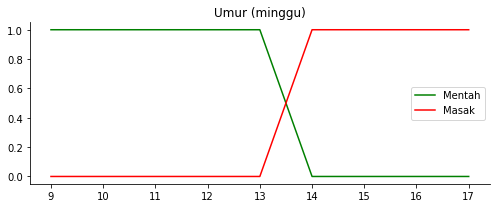

In [63]:
x_usia = RangeSubjektif(min_usia , max_usia , 1)
r_usia = np.array([
    [min_usia,min_usia,mid_usia,mid_usia],
    [mid_usia,mid_usia,max_usia,max_usia]
])

lo_usia , hi_usia = FuzzyShow(r_usia , x_usia, 'Umur (minggu)')

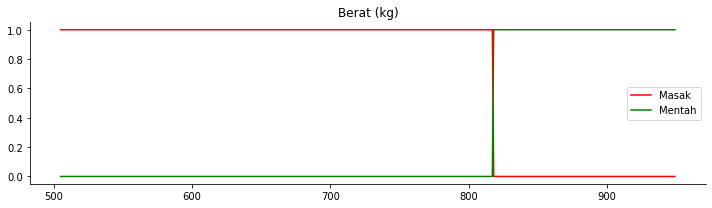

In [64]:
x_berat = RangeSubjektif(min_berat , max_berat , 1)
r_berat = np.array([
    [min_berat,min_berat,mid_berat,mid_berat],
    [mid_berat,mid_berat,max_berat,max_berat]
])

lo_berat , hi_berat = FuzzyShow1(r_berat , x_berat, 'Berat (kg)')

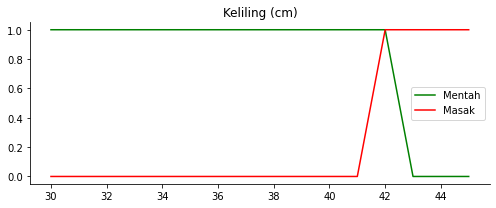

In [65]:
x_keliling = RangeSubjektif(min_keliling , max_keliling , 1)
r_keliling = np.array([
    [min_keliling,min_keliling,mid_keliling,mid_keliling],
    [mid_keliling,mid_keliling,max_keliling,max_keliling]
])

lo_keliling , hi_keliling = FuzzyShow(r_keliling , x_keliling, 'Keliling (cm)')

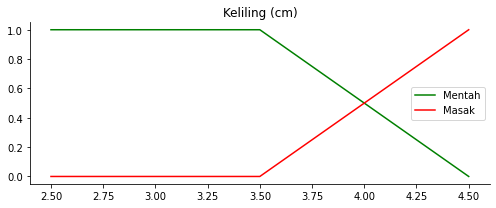

In [66]:
x_ukuran_batang = RangeSubjektif(min_ukuran_batang , max_ukuran_batang , 1)
r_ukuran_batang = np.array([
    [min_ukuran_batang,min_ukuran_batang,mid_ukuran_batang,mid_ukuran_batang],
    [mid_ukuran_batang,mid_ukuran_batang,max_ukuran_batang,max_ukuran_batang]
])

lo_ukuran_batang , hi_ukuran_batang = FuzzyShow(r_ukuran_batang , x_ukuran_batang, 'Keliling (cm)')

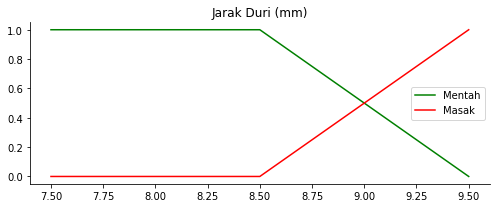

In [67]:
x_jarak_duri = RangeSubjektif(min_jarak_duri , max_jarak_duri , 1)
r_jarak_duri = np.array([
    [min_jarak_duri,min_jarak_duri,mid_jarak_duri,mid_jarak_duri],
    [mid_jarak_duri,mid_jarak_duri,max_jarak_duri,max_jarak_duri]
])

lo_jarak_duri , hi_jarak_duri = FuzzyShow(r_jarak_duri , x_jarak_duri, 'Jarak Duri (mm)')

In [68]:
def FungsiKeanggotaan(_range, _min , _hi, _nilai):
    mini = fuzz.interp_membership(_range,_min,_nilai)
    hi = fuzz.interp_membership(_range,_hi,_nilai)
    return mini , hi
    
i = 0
for usia in _data_usia:
    ini_dia = FungsiKeanggotaan(x_usia,lo_usia,hi_usia,usia)
    print(ini_dia)
    

(0.0, 1.0)
(0.0, 0.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)


In [69]:
i = 0
for berat in _data_berat:
    ini_dia = FungsiKeanggotaan(x_berat,hi_berat,lo_berat,berat)
    print(ini_dia)
    

(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(0.0, 1.0)
(0.0, 0.0)
(1.0, 0.0)


In [70]:
i = 0
for keliling in _data_keliling:
    ini_dia = FungsiKeanggotaan(x_keliling,lo_keliling,hi_keliling,keliling)
    print(ini_dia)
    

(0.0, 1.0)
(1.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(1.0, 0.5)
(1.0, 1.0)
(0.0, 0.0)
(0.0, 1.0)
(1.0, 1.0)
(1.0, 1.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)


In [71]:
i = 0
for ukuran_batang in _data_ukuran_batang:
    ini_dia = FungsiKeanggotaan(x_ukuran_batang,lo_ukuran_batang,hi_ukuran_batang,ukuran_batang)
    print(ini_dia)

(0.0, 1.0)
(0.5, 0.5)
(1.0, 0.0)
(0.0, 0.0)
(0.2999999999999998, 0.7000000000000002)
(0.0, 1.0)
(1.0, 0.0)
(0.5, 0.5)
(0.0, 1.0)
(0.2999999999999998, 0.7000000000000002)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(0.6000000000000001, 0.3999999999999999)
(0.7000000000000002, 0.2999999999999998)
(0.5, 0.5)


In [72]:
i = 0
for jarak_duri in _data_jarak_duri:
    ini_dia = FungsiKeanggotaan(x_jarak_duri,lo_jarak_duri,hi_jarak_duri,jarak_duri)
    print(ini_dia)

(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(0.5, 0.5)
(1.0, 0.0)
(0.0, 1.0)


In [123]:
# data_rule = [
#     {'No': '1', 'Rule': 'R1', 'Usia': 'Tinggi','Berat':'Tinggi','Keliling':'Tinggi','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Masak'},
#     {'No': '2', 'Rule': 'R2', 'Usia': 'Tinggi','Berat':'Tinggi','Keliling':'Tinggi','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Masak'},
#     {'No': '3', 'Rule': 'R3', 'Usia': 'Tinggi','Berat':'Tinggi','Keliling':'Tinggi','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Masak'},
#     {'No': '4', 'Rule': 'R4', 'Usia': 'Tinggi','Berat':'Tinggi','Keliling':'Tinggi','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Masak'},
#     {'No': '5', 'Rule': 'R5', 'Usia': 'Tinggi','Berat':'Tinggi','Keliling':'Rendah','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Masak'},
#     {'No': '6', 'Rule': 'R6', 'Usia': 'Tinggi','Berat':'Tinggi','Keliling':'Rendah','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Masak'},
#     {'No': '7', 'Rule': 'R7', 'Usia': 'Tinggi','Berat':'Tinggi','Keliling':'Rendah','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Masak'},
#     {'No': '8', 'Rule': 'R8', 'Usia': 'Tinggi','Berat':'Tinggi','Keliling':'Rendah','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Mentah'},
#     {'No': '9', 'Rule': 'R9', 'Usia': 'Tinggi','Berat':'Rendah','Keliling':'Tinggi','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Masak'},
#     {'No': '10', 'Rule': 'R10', 'Usia': 'Tinggi','Berat':'Rendah','Keliling':'Tinggi','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Masak'},
#     {'No': '11', 'Rule': 'R11', 'Usia': 'Tinggi','Berat':'Rendah','Keliling':'Tinggi','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Masak'},
#     {'No': '12', 'Rule': 'R12', 'Usia': 'Tinggi','Berat':'Rendah','Keliling':'Tinggi','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Masak'},
#     {'No': '13', 'Rule': 'R13', 'Usia': 'Tinggi','Berat':'Rendah','Keliling':'Rendah','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Masak'},
#     {'No': '14', 'Rule': 'R14', 'Usia': 'Tinggi','Berat':'Rendah','Keliling':'Rendah','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Masak'},
#     {'No': '15', 'Rule': 'R15', 'Usia': 'Tinggi','Berat':'Rendah','Keliling':'Rendah','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Masak'},
#     {'No': '16', 'Rule': 'R16', 'Usia': 'Tinggi','Berat':'Rendah','Keliling':'Rendah','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Masak'},
#     {'No': '17', 'Rule': 'R17', 'Usia': 'Rendah','Berat':'Tinggi','Keliling':'Tinggi','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Mentah'},
#     {'No': '18', 'Rule': 'R18', 'Usia': 'Rendah','Berat':'Tinggi','Keliling':'Tinggi','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Mentah'},
#     {'No': '19', 'Rule': 'R19', 'Usia': 'Rendah','Berat':'Tinggi','Keliling':'Tinggi','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Mentah'},
#     {'No': '20', 'Rule': 'R20', 'Usia': 'Rendah','Berat':'Tinggi','Keliling':'Tinggi','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Mentah'},
#     {'No': '21', 'Rule': 'R21', 'Usia': 'Rendah','Berat':'Tinggi','Keliling':'Rendah','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Mentah'},
#     {'No': '22', 'Rule': 'R22', 'Usia': 'Rendah','Berat':'Tinggi','Keliling':'Rendah','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Mentah'},
#     {'No': '23', 'Rule': 'R23', 'Usia': 'Rendah','Berat':'Tinggi','Keliling':'Rendah','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Mentah'},
#     {'No': '24', 'Rule': 'R24', 'Usia': 'Rendah','Berat':'Tinggi','Keliling':'Rendah','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Mentah'},
#     {'No': '25', 'Rule': 'R25', 'Usia': 'Rendah','Berat':'Rendah','Keliling':'Tinggi','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Masak'},
#     {'No': '26', 'Rule': 'R26', 'Usia': 'Rendah','Berat':'Rendah','Keliling':'Tinggi','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Mentah'},
#     {'No': '27', 'Rule': 'R27', 'Usia': 'Rendah','Berat':'Rendah','Keliling':'Tinggi','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Mentah'},
#     {'No': '28', 'Rule': 'R28', 'Usia': 'Rendah','Berat':'Rendah','Keliling':'Tinggi','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Mentah'},
#     {'No': '29', 'Rule': 'R29', 'Usia': 'Rendah','Berat':'Rendah','Keliling':'Rendah','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Mentah'},
#     {'No': '30', 'Rule': 'R30', 'Usia': 'Rendah','Berat':'Rendah','Keliling':'Rendah','Ukuran Batang':'Tinggi',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Mentah'},
#     {'No': '31', 'Rule': 'R31', 'Usia': 'Rendah','Berat':'Rendah','Keliling':'Rendah','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Tinggi', 'Keterangan' : 'Mentah'},
#     {'No': '32', 'Rule': 'R32', 'Usia': 'Rendah','Berat':'Rendah','Keliling':'Rendah','Ukuran Batang':'Rendah',
#      'Jarak Duri' : 'Rendah', 'Keterangan' : 'Mentah'},    
# ] 

# Creates DataFrame. 
# df = pd.DataFrame(data_rule) 
# df.to_excel("output.xlsx")
df = pd.read_csv("dataset/rule.csv")
    
# Print the data 
# df
from IPython.display import display, HTML
display(HTML("<h3></h3>"))
display(HTML(df.to_html(index=False)))

No,Rule,Usia,Berat,Keliling,Ukuran Batang,Jarak Duri,Keterangan
1,R1,Tinggi,Tinggi,Tinggi,Tinggi,Tinggi,Masak
2,R2,Tinggi,Tinggi,Tinggi,Tinggi,Rendah,Masak
3,R3,Tinggi,Tinggi,Tinggi,Rendah,Tinggi,Masak
4,R4,Tinggi,Tinggi,Tinggi,Rendah,Rendah,Masak
5,R5,Tinggi,Tinggi,Rendah,Tinggi,Tinggi,Masak
6,R6,Tinggi,Tinggi,Rendah,Tinggi,Rendah,Masak
7,R7,Tinggi,Tinggi,Rendah,Rendah,Tinggi,Masak
8,R8,Tinggi,Tinggi,Rendah,Rendah,Rendah,Mentah
9,R9,Tinggi,Rendah,Tinggi,Tinggi,Tinggi,Masak
10,R10,Tinggi,Rendah,Tinggi,Tinggi,Rendah,Masak


In [86]:
import itertools as it


my_dict={'Usia':['R','T'],'Berat':['R','T'],'Keliling':['R','T'],'Ukuran Batang':['R','T'],'Jarak Duri':['R','T']}
allNames = sorted(my_dict)
combinations = it.product(*(my_dict[Name] for Name in allNames))
counter = 0
for combi in combinations:
    print(combi)
    counter = counter + 1
print(counter)


('R', 'R', 'R', 'R', 'R')
('R', 'R', 'R', 'R', 'T')
('R', 'R', 'R', 'T', 'R')
('R', 'R', 'R', 'T', 'T')
('R', 'R', 'T', 'R', 'R')
('R', 'R', 'T', 'R', 'T')
('R', 'R', 'T', 'T', 'R')
('R', 'R', 'T', 'T', 'T')
('R', 'T', 'R', 'R', 'R')
('R', 'T', 'R', 'R', 'T')
('R', 'T', 'R', 'T', 'R')
('R', 'T', 'R', 'T', 'T')
('R', 'T', 'T', 'R', 'R')
('R', 'T', 'T', 'R', 'T')
('R', 'T', 'T', 'T', 'R')
('R', 'T', 'T', 'T', 'T')
('T', 'R', 'R', 'R', 'R')
('T', 'R', 'R', 'R', 'T')
('T', 'R', 'R', 'T', 'R')
('T', 'R', 'R', 'T', 'T')
('T', 'R', 'T', 'R', 'R')
('T', 'R', 'T', 'R', 'T')
('T', 'R', 'T', 'T', 'R')
('T', 'R', 'T', 'T', 'T')
('T', 'T', 'R', 'R', 'R')
('T', 'T', 'R', 'R', 'T')
('T', 'T', 'R', 'T', 'R')
('T', 'T', 'R', 'T', 'T')
('T', 'T', 'T', 'R', 'R')
('T', 'T', 'T', 'R', 'T')
('T', 'T', 'T', 'T', 'R')
('T', 'T', 'T', 'T', 'T')
32
